Fave - BI Assignment (Transactions)
---

# Section A
For Section A, please use the data in the Transactions tab. We would like to see how you work with data

    Answer the following questions using data from the Transactions table. Preferably using SQL / Python, but feel free to use any tools that you are familiar with (eg. Microsoft Excel)											

In [1]:
## import modules
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('Fave - BI Candidate Assignment - Transactions.csv')

df.head();

### Overview

In [3]:
## MetaData
df.nunique()

merchant_id               5
merchant_name             5
outlet_id                51
user_id               31069
category                  2
transaction_id        53141
transaction_status        2
transaction_date      52928
transaction_amount     7473
dtype: int64

In [4]:
Merchants = df['merchant_name'].unique().tolist()

df[['merchant_id','merchant_name','category']].groupby(['merchant_id','merchant_name','category']).count()

,,
merchant_id,merchant_name,category
8323,Delicious Seafood,F&B
9080,Comfort Apparels,Retail
9577,Best Fried Chicken,F&B
10056,ABC Electrical,Retail
10744,XYZ Appliances,Retail


---
## 1. What is the total revenue generated by each merchant throughout the period, sorted by highest to lowest? Also include the number of outlets each merchant has.

In [5]:
## (Question 1)

# [Period] Total Revenue & Number of outlets by Merchant
Table_1 = df.groupby(['merchant_name']).agg({'transaction_amount':sum,
                                                           'outlet_id':'nunique',
                                                           'user_id':'count'})

Table_1.rename(columns={'transaction_amount':'Total Revenue',
                        'outlet_id':'Total Outlets',
                        # additional column
                        'user_id':'(additional) Total Customers'}, inplace=True)

# additional column
Table_1['(additional) Average Revenue/Outlet'] = round(Table_1['Total Revenue']/Table_1['Total Outlets'],2)

Table_1.sort_values('Total Revenue',ascending=False, inplace=True)

Table_1

,Total Revenue,Total Outlets,(additional) Total Customers,(additional) Average Revenue/Outlet
merchant_name,,,,
ABC Electrical,5304159.67,11,3417,482196.33
Comfort Apparels,3499430.04,24,21180,145809.58
XYZ Appliances,3130163.52,8,1958,391270.44
Delicious Seafood,2815918.21,1,2142,2815918.21
Best Fried Chicken,1888418.70,7,24444,269774.10


---
## 2. Build a summary table to show each merchant's monthly performance in the following:											
	- Total Revenue										
	- Total Unique Customers										
	- Total Transactions										
	- Average Price per Transaction										

In [6]:
## set datetime column
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

month = df['transaction_date'].dt.month.rename('Month')
day = df['transaction_date'].dt.day_name().rename('Day')
hour = df['transaction_date'].dt.hour.rename('24 Hour')

In [7]:
## [Monthly] (Question 2)
Table_2 = df.groupby(['merchant_name',month]).agg({'transaction_amount':sum,
                                                                 'user_id':'nunique',
                                                                 'transaction_id':'count'})
# Rename Columns
Table_2.rename(columns={'transaction_amount':'Monthly Revenue',
                        'user_id':'Total Unique Customers',
                        'transaction_id':'Total Transaction'},
               inplace=True)

# APT
Table_2['Average Price/Transaction'] = Table_2['Monthly Revenue']/Table_2['Total Transaction']

Table_2

Monthly Revenue  Total Unique Customers  \
merchant_name      Month                                            
ABC Electrical     5                 7.00                       1   
                   6            113295.00                      39   
                   7            693816.50                     246   
                   8           2389661.99                     676   
                   9           1376323.28                     509   
                   10           731055.90                     344   
Best Fried Chicken 4            119176.68                    1427   
                   5            253578.51                    3059   
                   6            329463.28                    3855   
                   7            323678.41                    3774   
                   8            285886.56                    3173   
                   9            286700.50                    3052   
                   10           289934.76                    3153   
Comfort Apparels   4            401452.98                    1459   
                   5            412005.14                    1531   
                   6            557390.22                    2075   
                   7            532437.86                    2082   
                   8            725228.11                    2479   
                   9            436937.95                    1579   
                   10           433977.78                    1477   
Delicious Seafood  4            521645.74                     358   
                   5            444931.80                     308   
                   6            368468.42                     252   
                   7            370702.37                     263   
                   8            466395.88                     294   
                   9            316352.70                     214   
                   10           327421.30                     195   
XYZ Appliances     7            351024.22                     101   
                   8           1572357.75                     525   
                   9            554607.72                     263   
                   10           652173.83                     292   

                          Total Transaction  Average Price/Transaction  
merchant_name      Month                                                
ABC Electrical     5                      7                   1.000000  
                   6                     49                2312.142857  
                   7                    426                1628.677230  
                   8                   1365                1750.668125  
                   9                    943                1459.515673  
                   10                   627                1165.958373  
Best Fried Chicken 4                   1498                  79.557196  
                   5                   3359                  75.492263  
                   6                   4343                  75.860760  
                   7                   4311                  75.081979  
                   8                   3641                  78.518693  
                   9                   3563                  80.466040  
                   10                  3729                  77.751344  
Comfort Apparels   4                   2505                 160.260671  
                   5                   2607                 158.038028  
                   6                   3465                 160.862978  
                   7                   3678                 144.762877  
                   8                   4193                 172.961629  
                   9                   2509                 174.148246  
                   10                  2223                 195.221673  
Delicious Seafood  4                    395                1320.622127  
                   5                    333                1336.13153

---
## 3. For each merchant, how many new customers are they getting every month, and for each month's new customers, how many % of them come back in the next month to make a transaction?											
    (new customers are users who make a transaction for the first time at a particular merchant)

In [8]:
## [Monthly] (Question 3)

# List of Unique Customers by Month 
Unique = df.groupby(['merchant_name',month])['user_id'].unique().apply(list).rename('Unique')
New = df.groupby(['merchant_name',month])['user_id'].unique().apply(list).rename('New')

# Full membership dictionary
membership = {merchant:members
              for merchant,members in New.groupby(level=0).head(1).sum(level=0).items()}

In [9]:
def NewID(List, Membership, merchant):
    """ returns a list of NewIDs and updates membership """
    if Membership[merchant] == List:
        return List
    updated = Membership[merchant]
    operation = list(set(List)-set(updated))
    updated.extend(operation)
    Membership.update({merchant:updated})
    
    return operation

In [10]:
for merchant in Merchants:
    New[merchant] = Unique[merchant].apply(lambda x:NewID(x, membership, merchant))
    
Customers = pd.concat([Unique.apply(set), New.apply(set)], axis=1)
Customers['Total New Customers'] = Customers['New'].apply(len)

In [11]:
Customers['% Return Next Month'] = New.groupby(level=0).shift()
mask = Customers['% Return Next Month'].notnull()

f = lambda x: x['Unique'].intersection(x['% Return Next Month'])

Customers.loc[mask, '% Return Next Month'] = Customers.loc[mask].apply(f, axis=1).apply(len)
Customers['% Return Next Month'] = Customers['% Return Next Month'].groupby(level=0).shift(-1)

# Calculate percentage
Customers['% Return Next Month'] = Customers['% Return Next Month']*100/New.apply(len)

Table_3 = Customers[['Total New Customers','% Return Next Month']]
Table_3

Total New Customers % Return Next Month
merchant_name      Month                                         
ABC Electrical     5                        1                 100
                   6                       38             21.0526
                   7                      238              12.605
                   8                      639             5.47731
                   9                      454             4.84581
                   10                     301                 NaN
Best Fried Chicken 4                     1427             13.0343
                   5                     2873             13.7835
                   6                     3258             12.8607
                   7                     2792             12.4642
                   8                     1979             13.2895
                   9                     1817             11.9428
                   10                    1873                 NaN
Comfort Apparels   4                     1459             4.18095
                   5                     1470             4.82993
                   6                     1942               3.862
                   7                     1903             4.51918
                   8                     2182              3.5747
                   9                     1285             2.80156
                   10                    1188                 NaN
Delicious Seafood  4                      358             10.8939
                   5                      269             8.55019
                   6                      184             10.3261
                   7                      195             11.7949
                   8                      184             5.97826
                   9                      128             3.90625
                   10                     109                 NaN
XYZ Appliances     7                      101             26.7327
                   8                      498             12.4498
                   9                      195             4.61538
                   10                     248                 NaN

---
## 4. Based on the questions answered from Section A and any other information you are able to derive from the Transactions table, provide a brief assessment on each of the merchants.	
*************

### Summary for Previous Findings

Text(0.5, 0, 'Million')

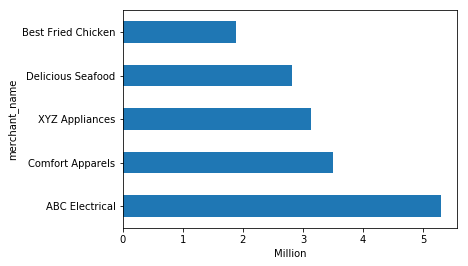

In [12]:
## Overview
ax=(Table_1['Total Revenue']/1_000_000).plot(kind='barh')
ax.set_xlabel("Million")

In [13]:
round(Table_2.groupby(level=0).mean(),1)

,Monthly Revenue,Total Unique Customers,Total Transaction,Average Price/Transaction
merchant_name,,,,
ABC Electrical,884026.6,302.5,569.5,1386.3
Best Fried Chicken,269774.1,3070.4,3492.0,77.5
Comfort Apparels,499918.6,1811.7,3025.7,166.6
Delicious Seafood,402274.0,269.1,306.0,1316.2
XYZ Appliances,782540.9,295.2,489.5,1590.3


In [14]:
def average(x):
    try: return x.mean()
    except: pass
    
round(Table_3.groupby(level=0).apply(average),1)

,Total New Customers,% Return Next Month
merchant_name,,
ABC Electrical,278.5,28.8
Best Fried Chicken,2288.4,12.9
Comfort Apparels,1632.7,4.0
Delicious Seafood,203.9,8.6
XYZ Appliances,260.5,14.6


## Total Membership

In [15]:
# Membership list by Merchant_ID
pd.Series(membership).apply(len)

ABC Electrical         1671
Best Fried Chicken    16019
Comfort Apparels      11429
Delicious Seafood      1427
XYZ Appliances         1042
dtype: int64

---
# New Findings

### Popular Product Price range

Text(0.5, 0, 'Price Range')

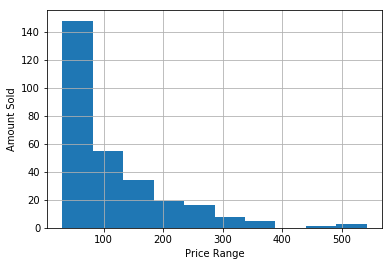

In [16]:
popular = df.groupby(['merchant_name','transaction_amount'])['transaction_id'].count()

# more than 30 purchases
ax=popular[popular > 30].hist()
ax.set_ylabel('Amount Sold')
ax.set_xlabel('Price Range')

Most of the products sold are below the 100 dollar range

## Busiest Month

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d4c04a58>,
      dtype=object)

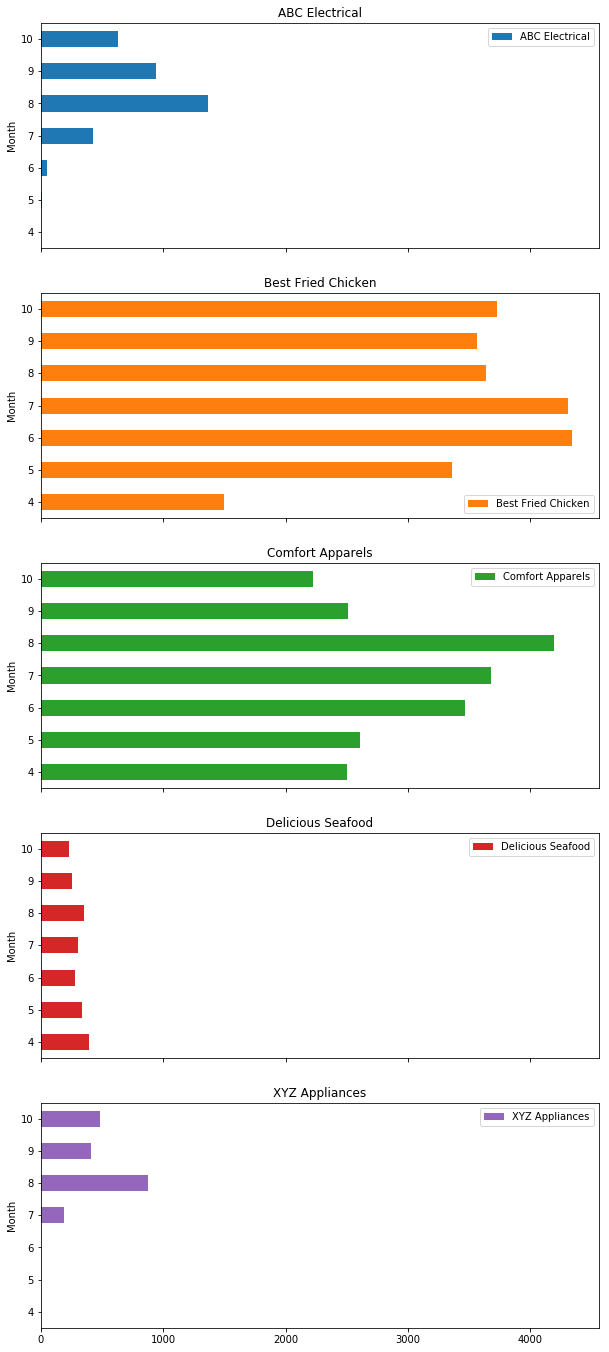

In [17]:
Busy_month = df.groupby(['merchant_name',month])['transaction_id'].count()

Busy_month.unstack(level=0).plot(kind='barh',
                                 subplots=True,
                                 #sharex=False,
                                 figsize=(10,24))

---
## Busiest Days

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d4fa1a58>,
      dtype=object)

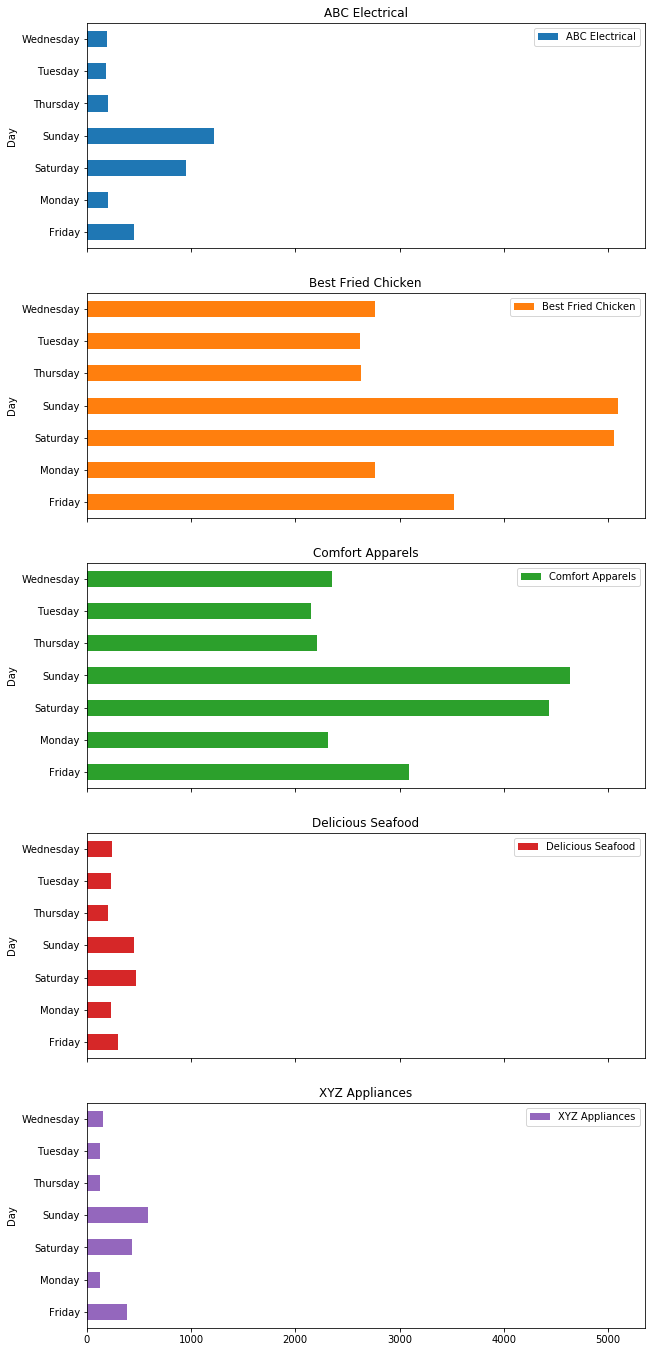

In [18]:
Busy_days = df.groupby(['merchant_name',day])['transaction_id'].count()

Busy_days.unstack(level=0).plot(kind='barh',
                                subplots=True,
                                #sharex=False,
                                figsize=(10,24))

---
## Busiest hour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19d47a84e0>,
      dtype=object)

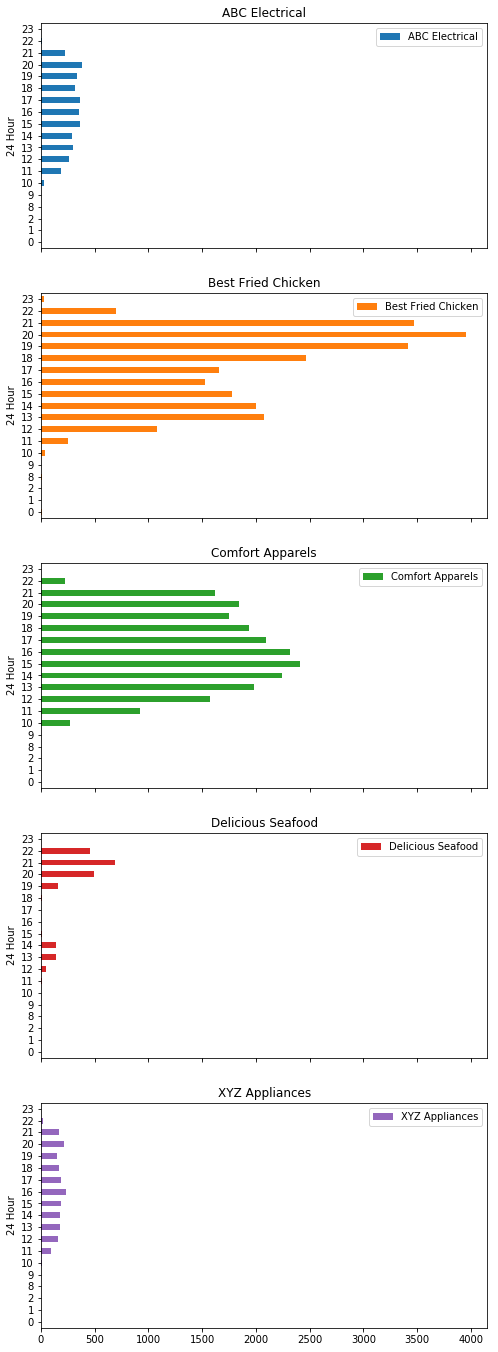

In [19]:
Busy_hour = df.groupby(['merchant_name',hour])['transaction_id'].count()

Busy_hour.unstack(level=0).plot(kind='barh',
                                subplots=True,
                                #sharex=False,
                                figsize=(8,24))

In [20]:
# Buying Appliances at 1AM? TV-Marketing at play?
df.loc[hour==1]

,merchant_id,merchant_name,outlet_id,user_id,category,transaction_id,transaction_status,transaction_date,transaction_amount
10908,9080,Comfort Apparels,15629,1555953,Retail,555123,Successful,2018-06-02 01:51:46,0.01
48525,10744,XYZ Appliances,19146,729438,Retail,1050805,Successful,2018-10-13 01:06:42,701.00
48526,10744,XYZ Appliances,19139,729438,Retail,1050806,Successful,2018-10-13 01:08:41,14.00


---
## Cancellation?
    - Note to merchant, something worth investigating?

In [21]:
## Parameters
Cancelled = df.loc[(df['transaction_status'] == 'Cancelled')&(df['transaction_amount'] >50)]

Cancelled = Cancelled.groupby(['merchant_name','outlet_id',hour]).agg({'transaction_amount':sum,
                                                                       'outlet_id':'count'})
Cancelled.columns = ['cancelled','count']

Cancelled.loc[Cancelled['count'] >2]

cancelled  count
merchant_name      outlet_id 24 Hour                  
Best Fried Chicken 17009     17          310.00      4
                             18          215.70      3
                   17010     18          267.95      4
                             19          267.92      3
                   17011     13          272.64      3
                             15          296.90      3
                             18          424.60      4
                             20          288.20      3
                             22          239.00      3
                   17014     20          410.90      4
                   17118     14          331.26      3
                             16          226.81      3
Delicious Seafood  14417     20         2631.30      3
                             21        12589.30      5
XYZ Appliances     19285     16         8307.00      3

---
## Outlet Performance
tracked by Outlet's Total Revenue

In [22]:
outlet = df.groupby(['merchant_name','outlet_id'])['transaction_amount'].sum()

#### Least Performing Outlets

In [23]:
# Benchmark for Outlet Performance (10% lower quantile Revenue)
lower_quantile = outlet.groupby(level=0).quantile(0.10)

In [24]:
## lowest performing outlets by merchants

for index, merchant in enumerate(Merchants):
    print('-----',merchant,'------')
    print(outlet.loc[Merchants[index]].loc[outlet.loc[Merchants[index]] < lower_quantile[index]],'\n')

----- Comfort Apparels ------
outlet_id
15628    17482.50
15633     3360.50
15636    17587.05
15638     8723.25
18286    13210.24
Name: transaction_amount, dtype: float64 

----- Delicious Seafood ------
Series([], Name: transaction_amount, dtype: float64) 

----- Best Fried Chicken ------
Series([], Name: transaction_amount, dtype: float64) 

----- ABC Electrical ------
outlet_id
17770     287037.14
17771      28816.00
17772     292807.27
17821      24681.00
17822     128622.76
17823     647733.95
17824     547262.00
17825     155959.00
18668    1108789.20
18669    1033808.50
18670    1048642.85
Name: transaction_amount, dtype: float64 

----- XYZ Appliances ------
outlet_id
19144    132637.38
Name: transaction_amount, dtype: float64 



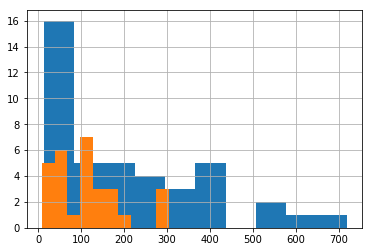

In [25]:
## Hand picked from 'Comfort Apparels'
# Y: Units Sold
# X: Price Range
df.loc[df['outlet_id']==15638]['transaction_amount'].hist()
df.loc[df['outlet_id']==15633]['transaction_amount'].hist()

Ouch! Only a few items sold. These are some bad numbers from 'Comfort Apparels'

## Most Successful Outlet

In [26]:
# Benchmark for Outstanding Performance (75% upper quantile Revenue)
upper_quantile = outlet.groupby(level=0).quantile(0.75)

In [27]:
## Best performing outlets by merchants

for index, merchant in enumerate(Merchants):
    print('-----',merchant,'------')
    print(outlet.loc[Merchants[index]].loc[outlet.loc[Merchants[index]] > upper_quantile[index]],'\n')

----- Comfort Apparels ------
Series([], Name: transaction_amount, dtype: float64) 

----- Delicious Seafood ------
outlet_id
14417    2815918.21
Name: transaction_amount, dtype: float64 

----- Best Fried Chicken ------
outlet_id
17009    451592.03
17010    232901.32
17011    511795.07
17014    385226.76
Name: transaction_amount, dtype: float64 

----- ABC Electrical ------
Series([], Name: transaction_amount, dtype: float64) 

----- XYZ Appliances ------
outlet_id
19147    550750.81
19285    869318.25
Name: transaction_amount, dtype: float64 



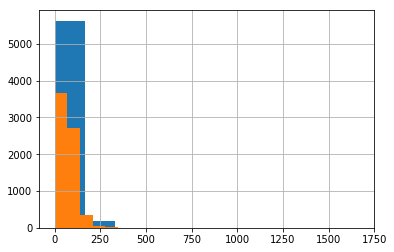

In [28]:
## Best outlet for "Best Fried Chicken"
# Y: Units Sold
# X: Price Range
df.loc[df['outlet_id']==17009]['transaction_amount'].hist()
df.loc[df['outlet_id']==17011]['transaction_amount'].hist()

Now that's what I'm talking about. "Best Fried Chicken" 

# Brief Summary

--- 
[ABC Electrical - 10056]
    - 11[Outlets] generating 5,304,159[Total Revenue] *highest on the list*
    - 28.8%[Retention Rate]
    - 1,386[Price/Transaction]
    - Most purchases are made on [Weekends] and in the late [Afternoons].
    - few underperforming outlets (ie. outlet_id = [17821, 17771])
    
---
[Comfort Apparels - 9080]
    - 24[Outlets] generating 3,499,430[Total Revenue]
    - 4%[Retention Rate]
    - Peak performance on [Weekends].
    - few underperforming outlets (ie. outlet_id = [15633, 15638, 18286])
    
---
[XYZ Appliances - 10744]
    - 8[Outlets] generating 3,130,163[Total Revenue]
    - 14.6%[Retention Rate]
    - Peaks on [Weekend Afternoons]
    - few outstanding outlets [Performance], (ie. outlet_id = [19285, 19147])
      
---
[Delicious Seafood - 8323]
    - 1 [Outlet]; 2,815,918[Total Revenue] 
    - 8.6% [Retention Rate]
    - Busy [Lunch hours (1~2pm)] and Peaks out on [Weekend Evenings]
    - a few order [Cancellations]
    
---
[Best Fried Chicken - 9577]
    - 16019[members]
    - 1,888,418[Revenue]
    - 12.9% [Retention Rate]
    - Peaks out on [Weekends] and around [7~9pm]

# Solutions
--- 
[ABC Electrical - 10056]

    Possibly competing with 'XYZ Appliances'. Clearly a well established Retailer with 11[Outlets]. 28.8%[Average Retention Rate] is acceptable considering the 1,386 [Monthly Average Price/Transaction] is on the high side. However there is room for improvements. Additionally a few underperforming outlets are in need for an intervention. ie. outlet_id = [17821, 17771] as I presume they generate close to no Profit after Cost deduction.
   
---
[Comfort Apparels - 9080]
     
    Having 24[Outlets], indicating a well established brand. Hitting second on Total Revenue with only 4%[Average Retention Rate]. However like any business, problem arises when benchmarks are not met; Hence there are a few underperforming outlets, ie. outlet_id = [15633, 15638, 18286]. It is to note most purchase are on [weekends].

---
[XYZ Appliances - 10744]

    Possibly a competitor to 'ABC Electrical'. But comparably only generates half of ABC Electrical's Total Revenue. This is possibly because the products sold from 'ABC Appliances' are more competitive as shown on Table_2's Average Price/Transaction. Moving forward, there are a few outlets with outstanding performance, worthy for case study; additionally we could give Best Selling Awards (if any) inorder to bolster morale ie. outlet_id = [19285, 19147]
      
---
[Delicious Seafood - 8323]
    
    You can't go wrong with delicious food, and the number speaks for itself; 2,815,918[Revenue]. Here's the amazing part, they only have 1 Outlet and the [Average Return Rate] is 8.6%. Easily the MVP of this dataset as there is huge growth potential. A franchise like this deserve an expansion proposal. Naturally busy during lunch hours (1~2pm) and peaks out on weekend evenings. Hence it's no surprise for a few order cancellation due time time constraints. *speculation*
    
---
[Best Fried Chicken - 9577]
    
    It's in the name, the best fried chicken in town; 1,888,418[Revenue]; They have gained a total of 16019 new members over the period. With huge competitors out there, maintaining 12.9% [Average Return Rate] is no small feat. Since peaks out on weekends and mostly busy evenings (7~9pm), promoting weekday deals seems like a plausible proposal. Plus foodies loved them, furthuer franchise expansion is recommended.

---
# Bonus thoughts
## Are these E-Wallet Transactions?
If true, the data also tells another story, the number of new users are decreasing;
However it also shows that E-wallet has proven useful for returning customers as we see the Return Rate increases.


In [29]:
Table_3.groupby(level=1).apply(average)

,Total New Customers,% Return Next Month
Month,,
4,1081.333333,9.369713
5,1153.250000,31.790905
6,1355.500000,12.025342
7,1045.800000,13.623190
8,1096.400000,8.153922
9,775.800000,5.622354
10,743.800000,NaN


Additionally much can be done for businesses that ultilises E-Wallets,
they have an early advantage to do *sponsored ads* and *early promotion* from the app.

Who would've taught that your wallet would become an advertisment platform. **mindblown**

The 'Tipping Point' is bound to happen. The question is when.
The numbers looks promising, but only time will tell.